In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import mplcyberpunk
from bcb import sgs

import matplotlib
matplotlib.rcParams['figure.figsize'] = (14,7)

# Importando os codigos do Banco Central

In [13]:
Energia=sgs.get({'Energia':1406},start='2002-01-01',end='2023-07-01')

In [14]:
Industria_geral = sgs.get({'Industria_geral':28503},start='2002-01-01',end='2023-07-01')

In [15]:
Comercio_total = sgs.get({'Comercio_total':28473},start='2002-01-01',end='2023-07-01')

In [16]:
Petroleo = sgs.get({'Petroleo':1389},start='2002-01-01',end='2023-07-01')

In [17]:
Energia_Industrial = sgs.get({'Energia_Industrial':1404},start='2002-01-01',end='2023-07-01')

In [18]:
pib_mes = sgs.get({'pib_mes':4380},start='2002-01-01',end='2023-07-01')

In [19]:
Gas_natural = sgs.get({'Gas_natural':1392},start='2002-01-01',end='2023-07-01')

In [20]:
Energia_do_comercio = sgs.get({'Energia_do_comercio':1402},start='2002-01-01',end='2023-07-01')

In [21]:
Emprego = sgs.get({'Emprego':28763},start='2002-01-01',end='2023-07-01')

In [22]:
demand = pd.DataFrame()
start_date = Industria_geral.index[0]
demand['Industria_geral'] = Industria_geral/Industria_geral.loc[start_date]
demand['pib_mes'] = pib_mes/pib_mes.loc[start_date]
demand['Energia'] = Energia/Energia.loc[start_date]
demand['Energia_Industrial'] = Energia_Industrial/Energia_Industrial.loc[start_date]
demand['Petroleo'] = Petroleo/Petroleo.loc[start_date]
demand['Gas_natural'] = Gas_natural/Gas_natural.loc[start_date]
demand['Energia_do_comercio'] = Energia_do_comercio/Energia_do_comercio.loc[start_date]
demand['Comercio_total'] = Comercio_total/Comercio_total.loc[start_date]
demand['Emprego'] = Emprego/Emprego.loc[start_date]
demand

,Industria_geral,pib_mes,Energia,Energia_Industrial,Petroleo,Gas_natural,Energia_do_comercio,Comercio_total,Emprego
Date,,,,,,,,,
2002-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2002-02-01,1.024229,0.992012,1.016619,1.051744,0.995146,1.025830,1.018961,0.998609,1.003689
2002-03-01,1.016520,1.054015,1.041525,1.098717,1.010402,1.033210,1.015664,1.002384,1.007749
2002-04-01,1.019824,1.071289,1.107284,1.141130,1.018724,1.029520,1.087936,0.999007,1.015625
2002-05-01,1.019824,1.099468,1.107687,1.157884,1.027739,1.022140,1.072547,1.002583,1.022634
...,...,...,...,...,...,...,...,...,...
2023-03-01,1.104626,8.354761,2.048154,1.694094,2.160194,3.214022,2.364661,2.022452,2.006101
2023-04-01,1.100220,8.051555,2.010616,1.678931,2.178225,3.287823,2.346799,2.017286,2.014281
2023-05-01,1.106828,8.037728,1.933569,1.668752,2.219834,3.350554,2.154438,1.997616,2.021294


# Regressões simples

<function matplotlib.pyplot.show(close=None, block=None)>

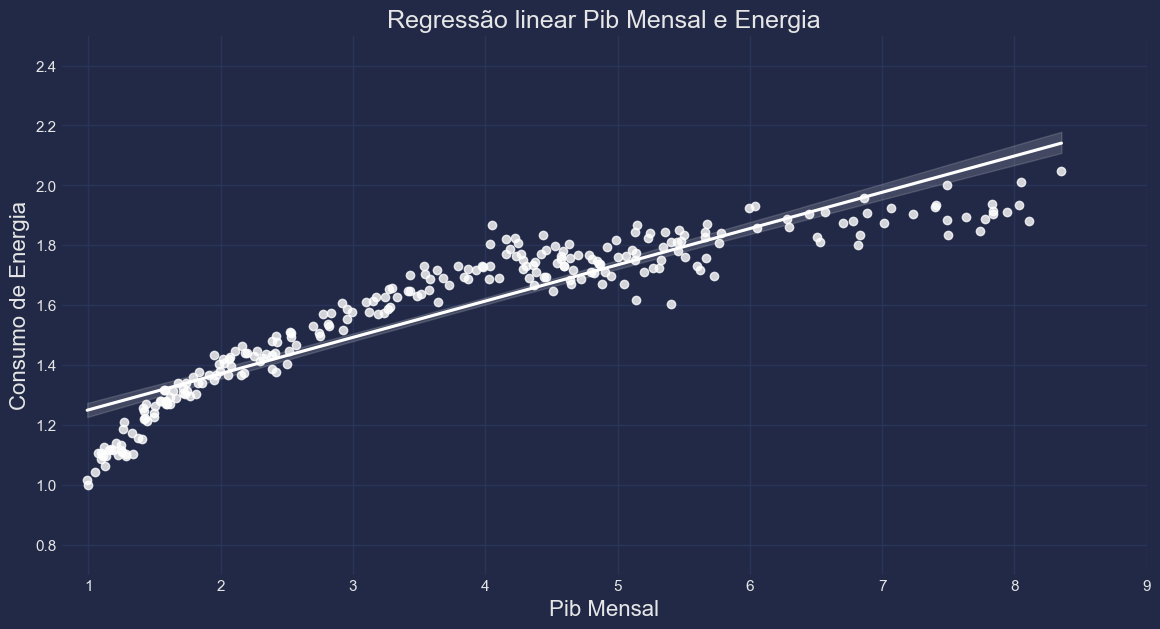

In [23]:
plt.style.use('cyberpunk')
plt.grid(True)
sns.regplot(x='pib_mes',y='Energia', data= demand, color= 'white')
plt.title('Regressão linear Pib Mensal e Energia',fontsize=18)
plt.axis([0.8,9,0.7,2.5])
plt.xlabel('Pib Mensal',fontsize=16)
plt.ylabel('Consumo de Energia',fontsize=16)
plt.show

In [24]:
y = demand['Energia']
x1 = demand['pib_mes']
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Energia   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1474.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.91e-108
Time:                        00:41:34   Log-Likelihood:                 236.56
No. Observations:                 259   AIC:                            -469.1
Df Residuals:                     257   BIC:                            -462.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1287      0.013     84.862      0.000       1.103       1.155
pib_mes        0.1211      0.003     38.395      0.000       0.115       0.127
==============================================================================
Omnibus:                        9.459   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.314
Skew:                          -0.423   Prob(JB):                      0.00949
Kurtosis:                       2.617   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

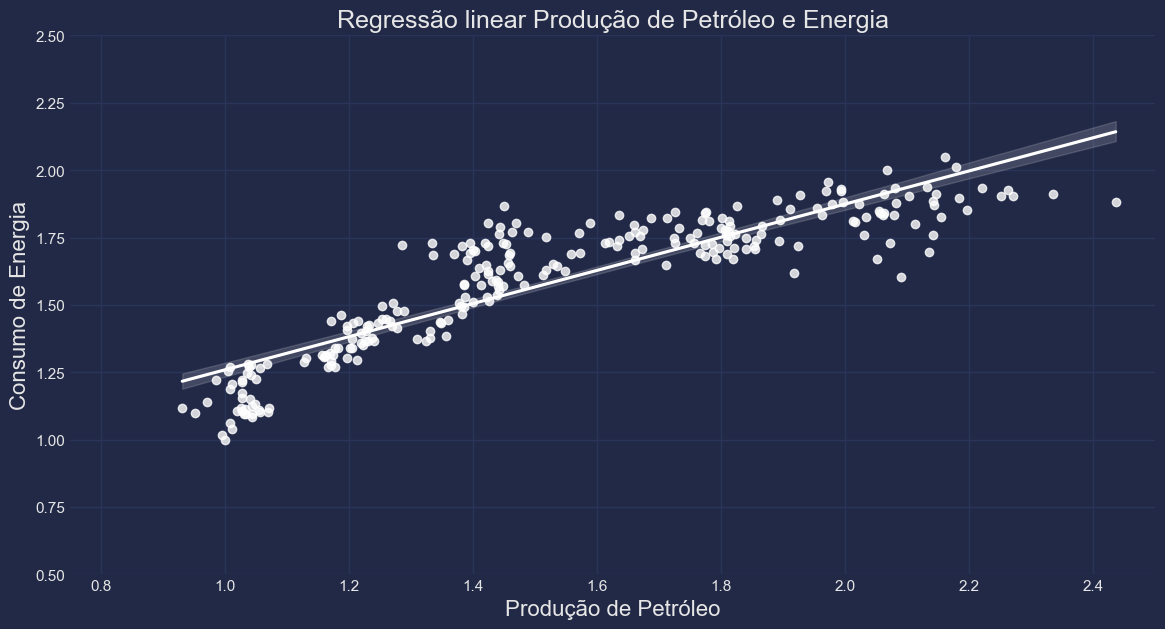

In [25]:
plt.style.use('cyberpunk')
plt.grid(True)
sns.regplot(x='Petroleo',y='Energia', data= demand, color= 'white')
plt.title('Regressão linear Produção de Petróleo e Energia',fontsize=18)
plt.axis([0.75,2.5,0.5,2.5])
plt.xlabel('Produção de Petróleo',fontsize=16)
plt.ylabel('Consumo de Energia',fontsize=16)
plt.show

In [26]:
y = demand['Energia']
x1 = demand['Petroleo']
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Energia   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1006.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           8.12e-91
Time:                        00:41:34   Log-Likelihood:                 195.69
No. Observations:                 259   AIC:                            -387.4
Df Residuals:                     257   BIC:                            -380.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6449      0.030     21.190      0.000       0.585       0.705
Petroleo       0.6149      0.019     31.711      0.000       0.577       0.653
==============================================================================
Omnibus:                        1.375   Durbin-Watson:                   0.199
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                1.080
Skew:                           0.129   Prob(JB):                        0.583
Kurtosis:                       3.182   Cond. No.                         9.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

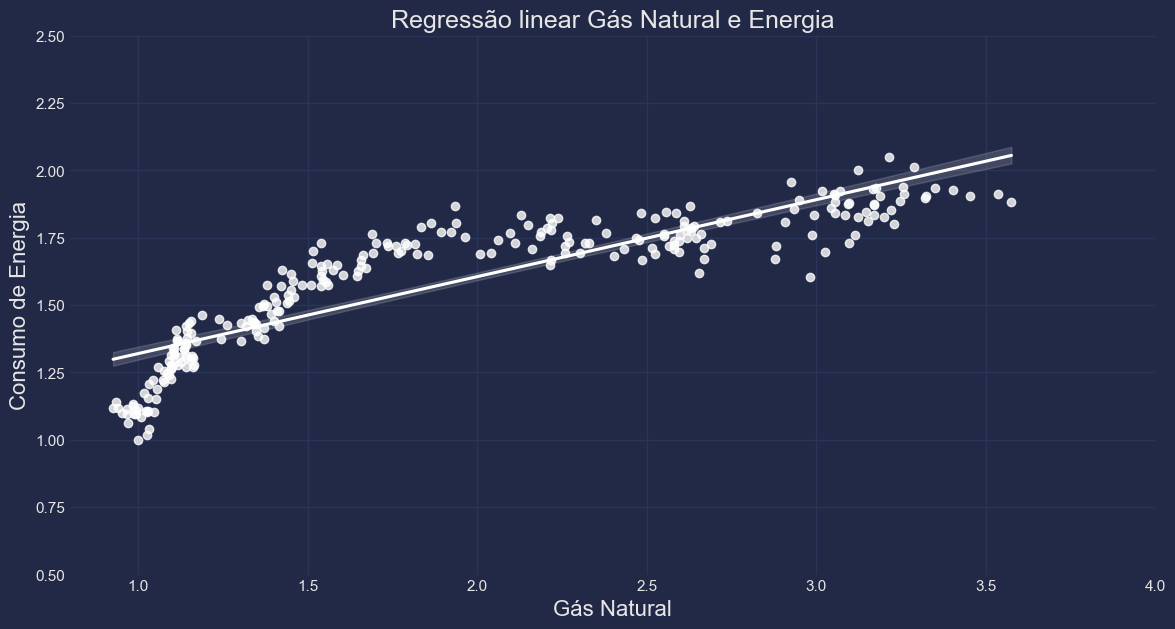

In [27]:
plt.style.use('cyberpunk')
plt.grid(True)
sns.regplot(x='Gas_natural',y='Energia', data= demand, color= 'white')
plt.title('Regressão linear Gás Natural e Energia',fontsize=18)
plt.axis([0.8,4,0.5,2.5])
plt.xlabel('Gás Natural',fontsize=16)
plt.ylabel('Consumo de Energia',fontsize=16)
plt.show

In [28]:
y = demand['Energia']
x1 = demand['Gas_natural']
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Energia   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     868.0
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           2.27e-84
Time:                        00:41:34   Log-Likelihood:                 180.75
No. Observations:                 259   AIC:                            -357.5
Df Residuals:                     257   BIC:                            -350.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.0345      0.020     51.494      0.000       0.995       1.074
Gas_natural     0.2855      0.010     29.462      0.000       0.266       0.305
==============================================================================
Omnibus:                        3.110   Durbin-Watson:                   0.140
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.732
Skew:                          -0.162   Prob(JB):                        0.255
Kurtosis:                       2.615   Cond. No.                         6.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

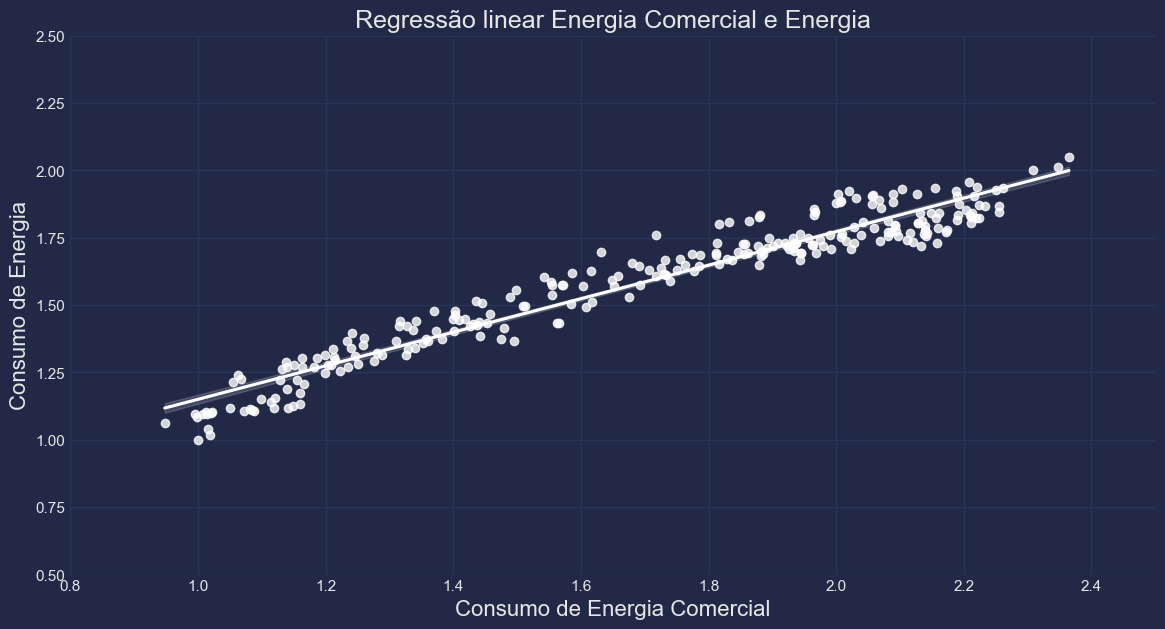

In [29]:
plt.style.use('cyberpunk')
plt.grid(True)
sns.regplot(x='Energia_do_comercio',y='Energia', data= demand, color= 'white')
plt.title('Regressão linear Energia Comercial e Energia',fontsize=18)
plt.axis([0.8,2.5,0.5,2.5])
plt.xlabel('Consumo de Energia Comercial',fontsize=16)
plt.ylabel('Consumo de Energia',fontsize=16)
plt.show

In [30]:
y = demand['Energia']
x1 = demand['Energia_do_comercio']
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Energia   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     3688.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.99e-154
Time:                        00:41:35   Log-Likelihood:                 343.22
No. Observations:                 259   AIC:                            -682.4
Df Residuals:                     257   BIC:                            -675.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5283      0.018     29.626      0.000       0.493       0.563
Energia_do_comercio     0.6221      0.010     60.727      0.000       0.602       0.642
==============================================================================
Omnibus:                        4.537   Durbin-Watson:                   0.141
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.193
Skew:                           0.114   Prob(JB):                        0.203
Kurtosis:                       2.506   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

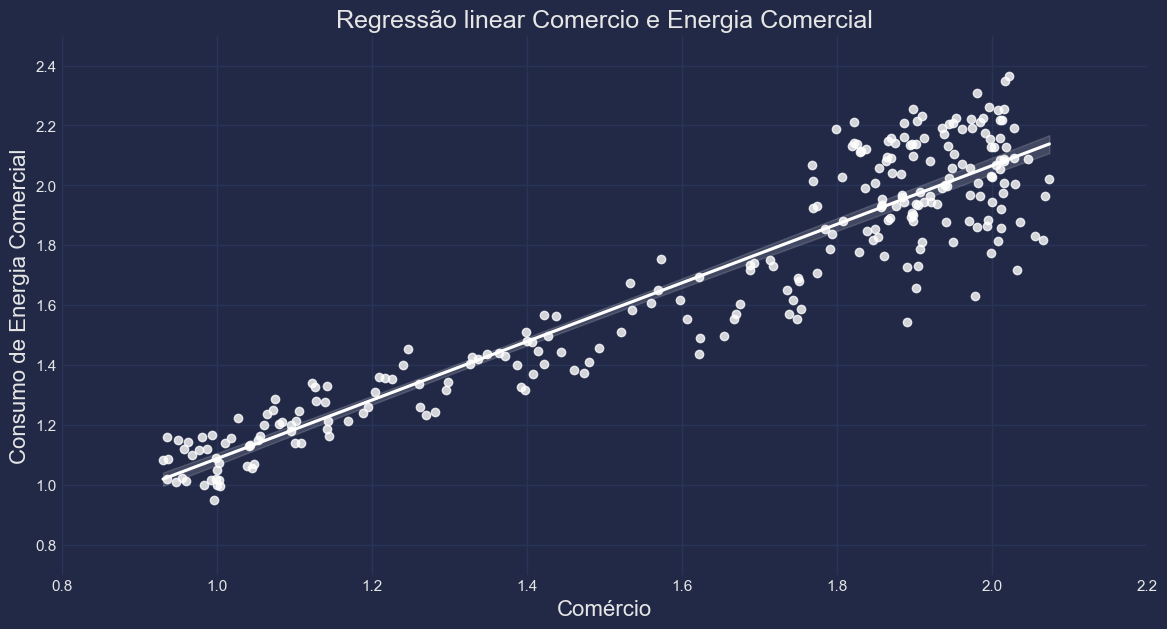

In [31]:
plt.style.use('cyberpunk')
plt.grid(True)
sns.regplot(x='Comercio_total',y='Energia_do_comercio', data= demand, color= 'white')
plt.title('Regressão linear Comercio e Energia Comercial',fontsize=18)
plt.axis([0.8,2.2,0.7,2.5])
plt.xlabel('Comércio',fontsize=16)
plt.ylabel('Consumo de Energia Comercial',fontsize=16)
plt.show

In [32]:
y = demand['Energia_do_comercio']
x1 = demand['Comercio_total']
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Energia_do_comercio   R-squared:                       0.878
Model:                             OLS   Adj. R-squared:                  0.878
Method:                  Least Squares   F-statistic:                     1850.
Date:                 Sun, 22 Sep 2024   Prob (F-statistic):          2.07e-119
Time:                         00:41:35   Log-Likelihood:                 147.76
No. Observations:                  259   AIC:                            -291.5
Df Residuals:                      257   BIC:                            -284.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1083      0.038      2.859      0.005       0.034       0.183
Comercio_total     0.9786      0.023     43.009      0.000       0.934       1.023
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.550
Skew:                          -0.183   Prob(JB):                        0.461
Kurtosis:                       3.095   Cond. No.                         9.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

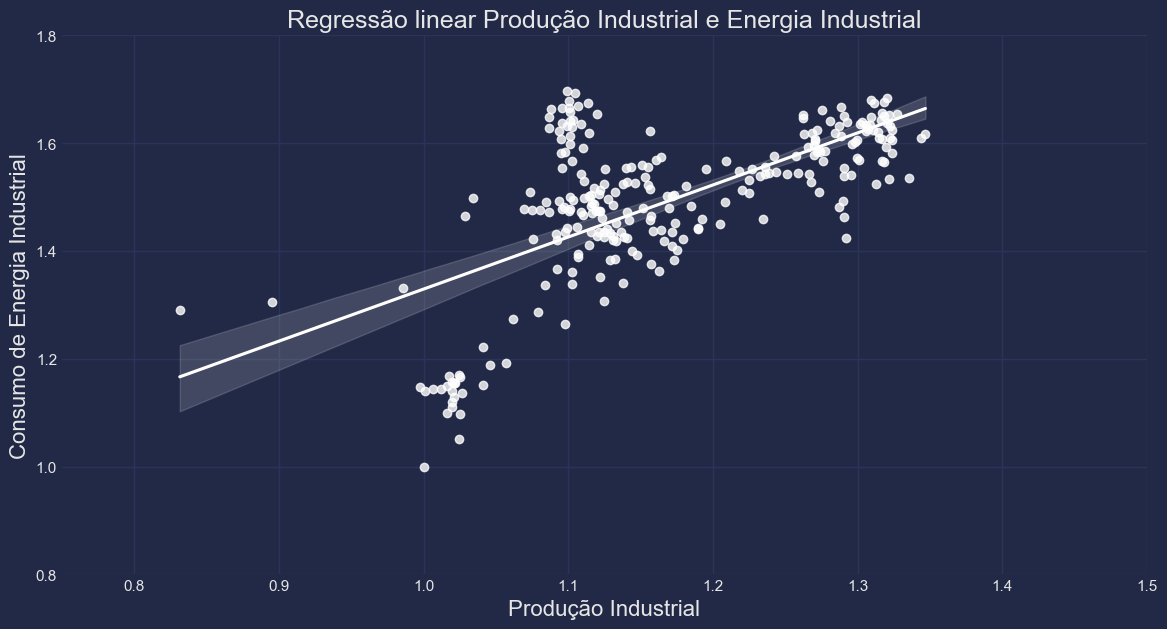

In [33]:
plt.style.use('cyberpunk')
plt.grid(True)
sns.regplot(x='Industria_geral',y='Energia_Industrial', data= demand, color= 'white')
plt.title('Regressão linear Produção Industrial e Energia Industrial',fontsize=18)
plt.axis([0.75,1.5,0.8,1.8])
plt.xlabel('Produção Industrial',fontsize=16)
plt.ylabel('Consumo de Energia Industrial',fontsize=16)
plt.show

In [34]:
y = demand['Energia_Industrial']
x1 = demand['Industria_geral']
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Energia_Industrial   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     192.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):           4.21e-33
Time:                        00:41:35   Log-Likelihood:                 204.92
No. Observations:                 259   AIC:                            -405.8
Df Residuals:                     257   BIC:                            -398.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3636      0.081      4.464      0.000       0.203       0.524
Industria_geral     0.9659      0.070     13.890      0.000       0.829       1.103
==============================================================================
Omnibus:                        2.248   Durbin-Watson:                   0.149
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                2.223
Skew:                          -0.001   Prob(JB):                        0.329
Kurtosis:                       3.454   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<function matplotlib.pyplot.show(close=None, block=None)>

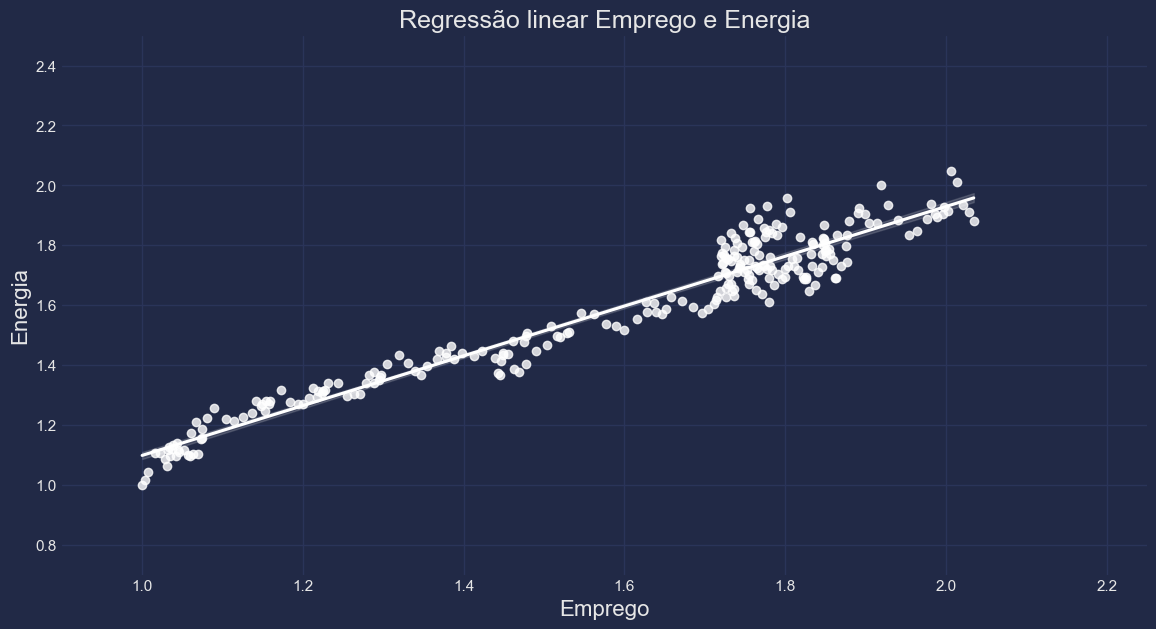

In [35]:
plt.style.use('cyberpunk')
plt.grid(True)
sns.regplot(x='Emprego',y='Energia', data= demand, color= 'white')
plt.title('Regressão linear Emprego e Energia',fontsize=18)
plt.axis([0.9,2.25,0.7,2.5])
plt.xlabel('Emprego',fontsize=16)
plt.ylabel('Energia',fontsize=16)
plt.show

In [36]:
y = demand['Energia']
x1 = demand['Emprego']
x = sm.add_constant(x1)
reg = sm.OLS(y,x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Energia   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     3968.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          2.94e-158
Time:                        00:41:35   Log-Likelihood:                 352.10
No. Observations:                 259   AIC:                            -700.2
Df Residuals:                     257   BIC:                            -693.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2670      0.021     12.560      0.000       0.225       0.309
Emprego        0.8311      0.013     62.992      0.000       0.805       0.857
==============================================================================
Omnibus:                        8.410   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.294
Skew:                           0.423   Prob(JB):                       0.0158
Kurtosis:                       3.234   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regressão multipla

In [37]:
y = demand['Energia']
x1 = demand['Comercio_total']
x2 = demand['Industria_geral']
x3 = demand['Petroleo']
x = np.column_stack((x1,x2,x3))
x = sm.add_constant(x)
reg2 = sm.OLS(y,x).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Energia   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1742.
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.72e-169
Time:                        00:41:35   Log-Likelihood:                 386.80
No. Observations:                 259   AIC:                            -765.6
Df Residuals:                     255   BIC:                            -751.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2362      0.061      3.890      0.000       0.117       0.356
x1             0.4086      0.025     16.247      0.000       0.359       0.458
x2             0.2313      0.052      4.442      0.000       0.129       0.334
x3             0.2714      0.025     10.722      0.000       0.222       0.321
==============================================================================
Omnibus:                        7.633   Durbin-Watson:                   0.597
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                9.877
Skew:                          -0.227   Prob(JB):                      0.00717
Kurtosis:                       3.842   Cond. No.                         67.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

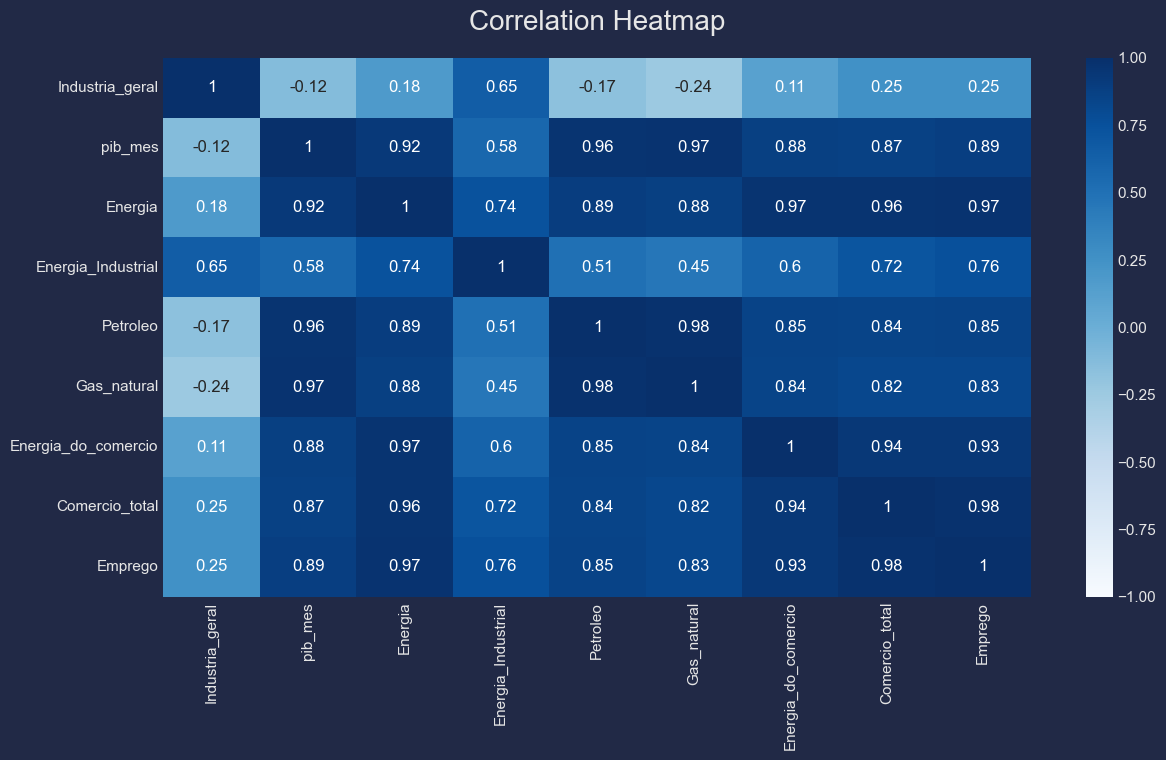

<Figure size 1200x1200 with 0 Axes>

In [38]:
heatmap = sns.heatmap(demand.corr(), vmin=-1, vmax=1, cmap='Blues', annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':20}, pad = 20)
plt.figure(figsize=(12,12))
plt.show()